딥러닝은 심층 신경망(DNN, Deep Neural Network)이라고도 함
- 심층: 깊은 층으로 이루어진
- 신경망: 뇌의 신경 회로를 모방한 계산 모델 </br>

→ 깊은 층으로 이루어진 신경망 모델 </br>

```7장: 신경망의 구성 요소인 뉴런 모델과 2층의 신경망 모델에 대해 설명```

# 7.1 뉴런 모델
- 신경망 모델은 '뉴런 모델' 단위로 구축
- 뉴런 모델은 뇌의 신경 세포에서 힌트를 얻어 만들어진 수학적 모델
- 앞으로 실제 뇌의 것은 '신경 세포', 수학적 모델을 '뉴런'이라 통칭


### 7.1.1 신경 세포

- 신경 세포는 축삭이라는 케이블을 통해 전기적 펄스를 다른 신경 세포에 전달
- 축삭은 시냅스라고 불리는 인터페이스를 통해 펄스를 다음 신경 세포에 전달하게 됨
- 다른 세포에게서 펄스를 전달받은 세포 내부의 전위 증감
- 전위가 일정한 한계 값을 초과하면 해당 세포는 전기 펄스를 발신하고, 그 펄스는 축삭을 타고 다음 신경 세포로 전달

### 7.1.2 뉴런 모델
- 뉴런 모델은 신경 세포의 움직임을 단순화한 수학적 모델임
- 뉴런에 2개의 입력 x =(x0, x1)가 들어오는 것을 가정함

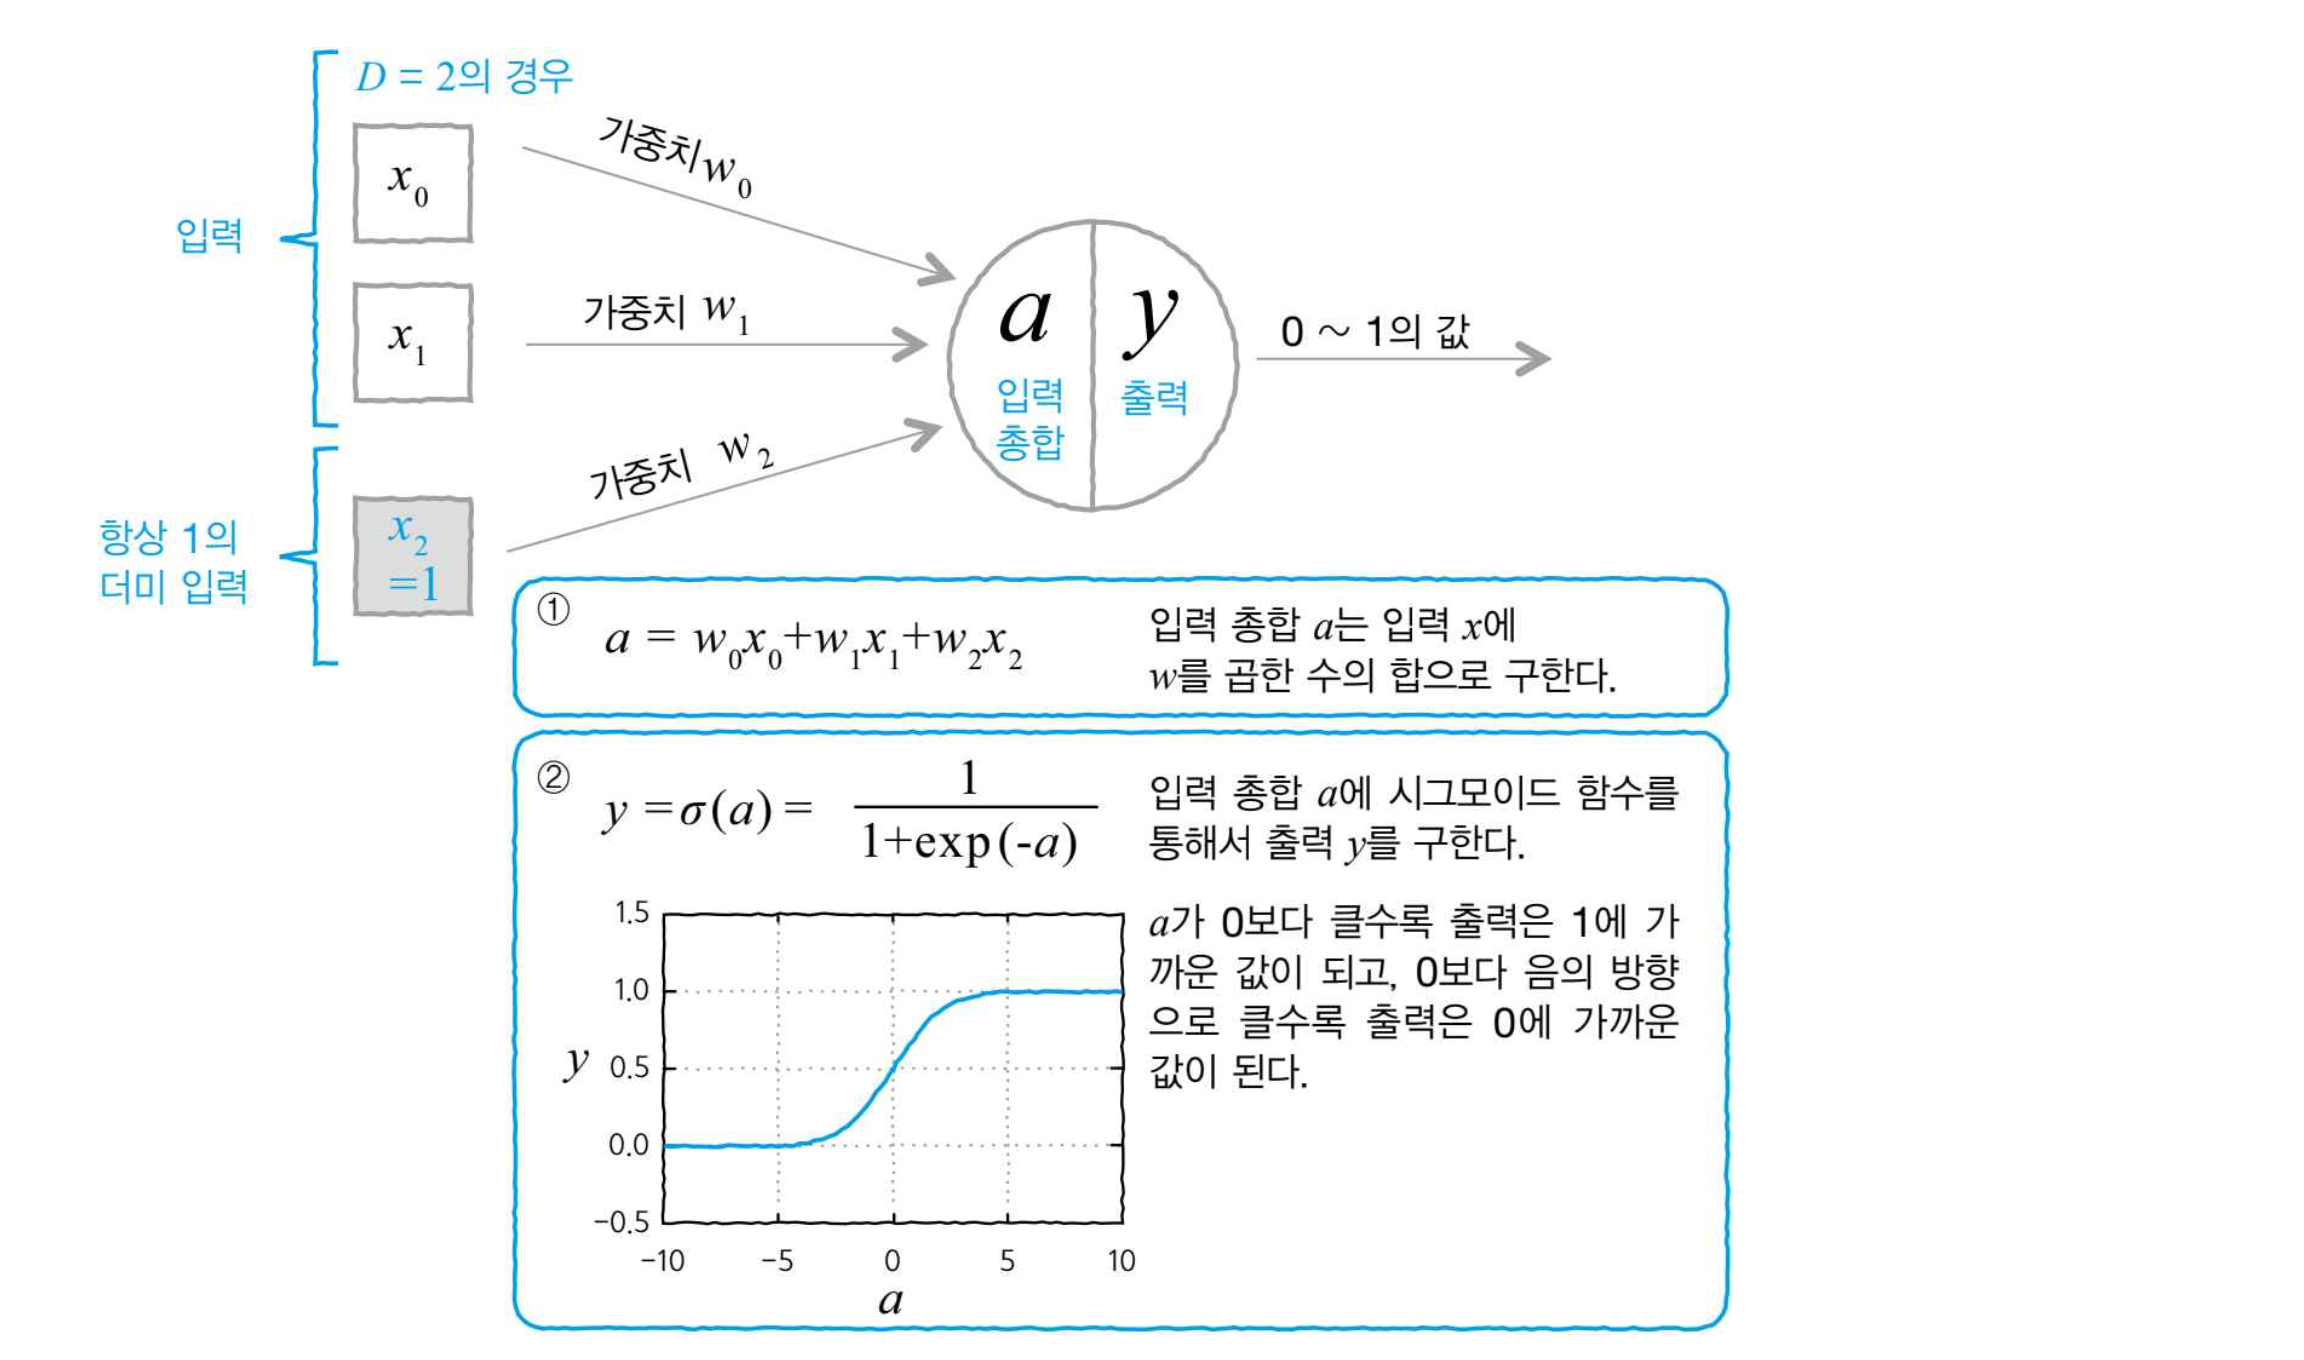

- 입력: 실수
- 가중치 w: 각각의 입력에 대한 시냅스의 전달 강도
    - x2: 바이어스(더미) 입력
    - w2: 바이어스 매개 변수 (항상 1을 갖는다고 가정) → 시그마로 깔끔하게 정리 가능
- 입력 총합 a: 막 전위
- 시그모이드 함수를 통과한 값을 뉴런의 출력값 y로 함
    - 0~1까지의 연속된 값을 가짐
    - 단위 시간 당 펄스 수, 발화 빈도를 나타낸다고 이해하면 됨
    - a가 클수록 발화빈도는 한계값인 1에 가까워지고, a가 음의 큰 값을 취할수록 발화 빈도는 0에 가까워져 거의 발화하지 않은 상태가 됨

→ 여기서 정의한 뉴런 모델은 로지스틱 회귀 모델
- 한쪽은 0에서 0.5, 다른 한쪽은 0.5에서 1의 숫자를 할당하는 기능을 함

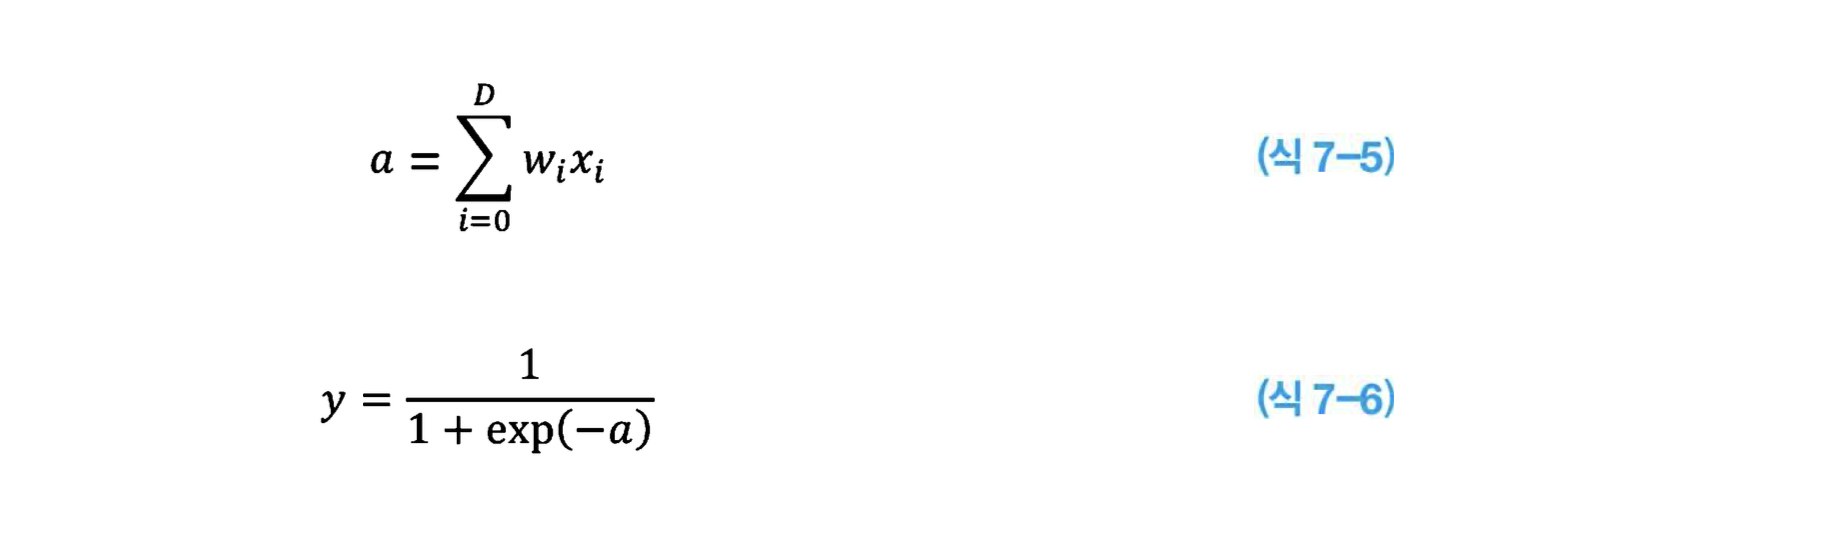

- 뉴런 모델에서 입력을 2개가 아닌 D개, 즉 2차원에서 D차원으로 일반화하면 위와 같은 식으로 정의할 수 있음
    - xD는 항상 1의 값을 갖는 더미 입력
    - 뉴런 모델은 D차원의 입력 공간을 D-1차원 평면(과 같은 공간)에서 2개로 나눈다고 할 수 있음
        - 예: 2차원의 입력 공간 (x0, x1)을 직선으로 나누어 한쪽은 0에서 0.5, 다른 한쪽은 0.5에서 1의 숫자를 할당

# 7.2 신경망 모델
### 7.2.1 2층 피드 포워드 신경망


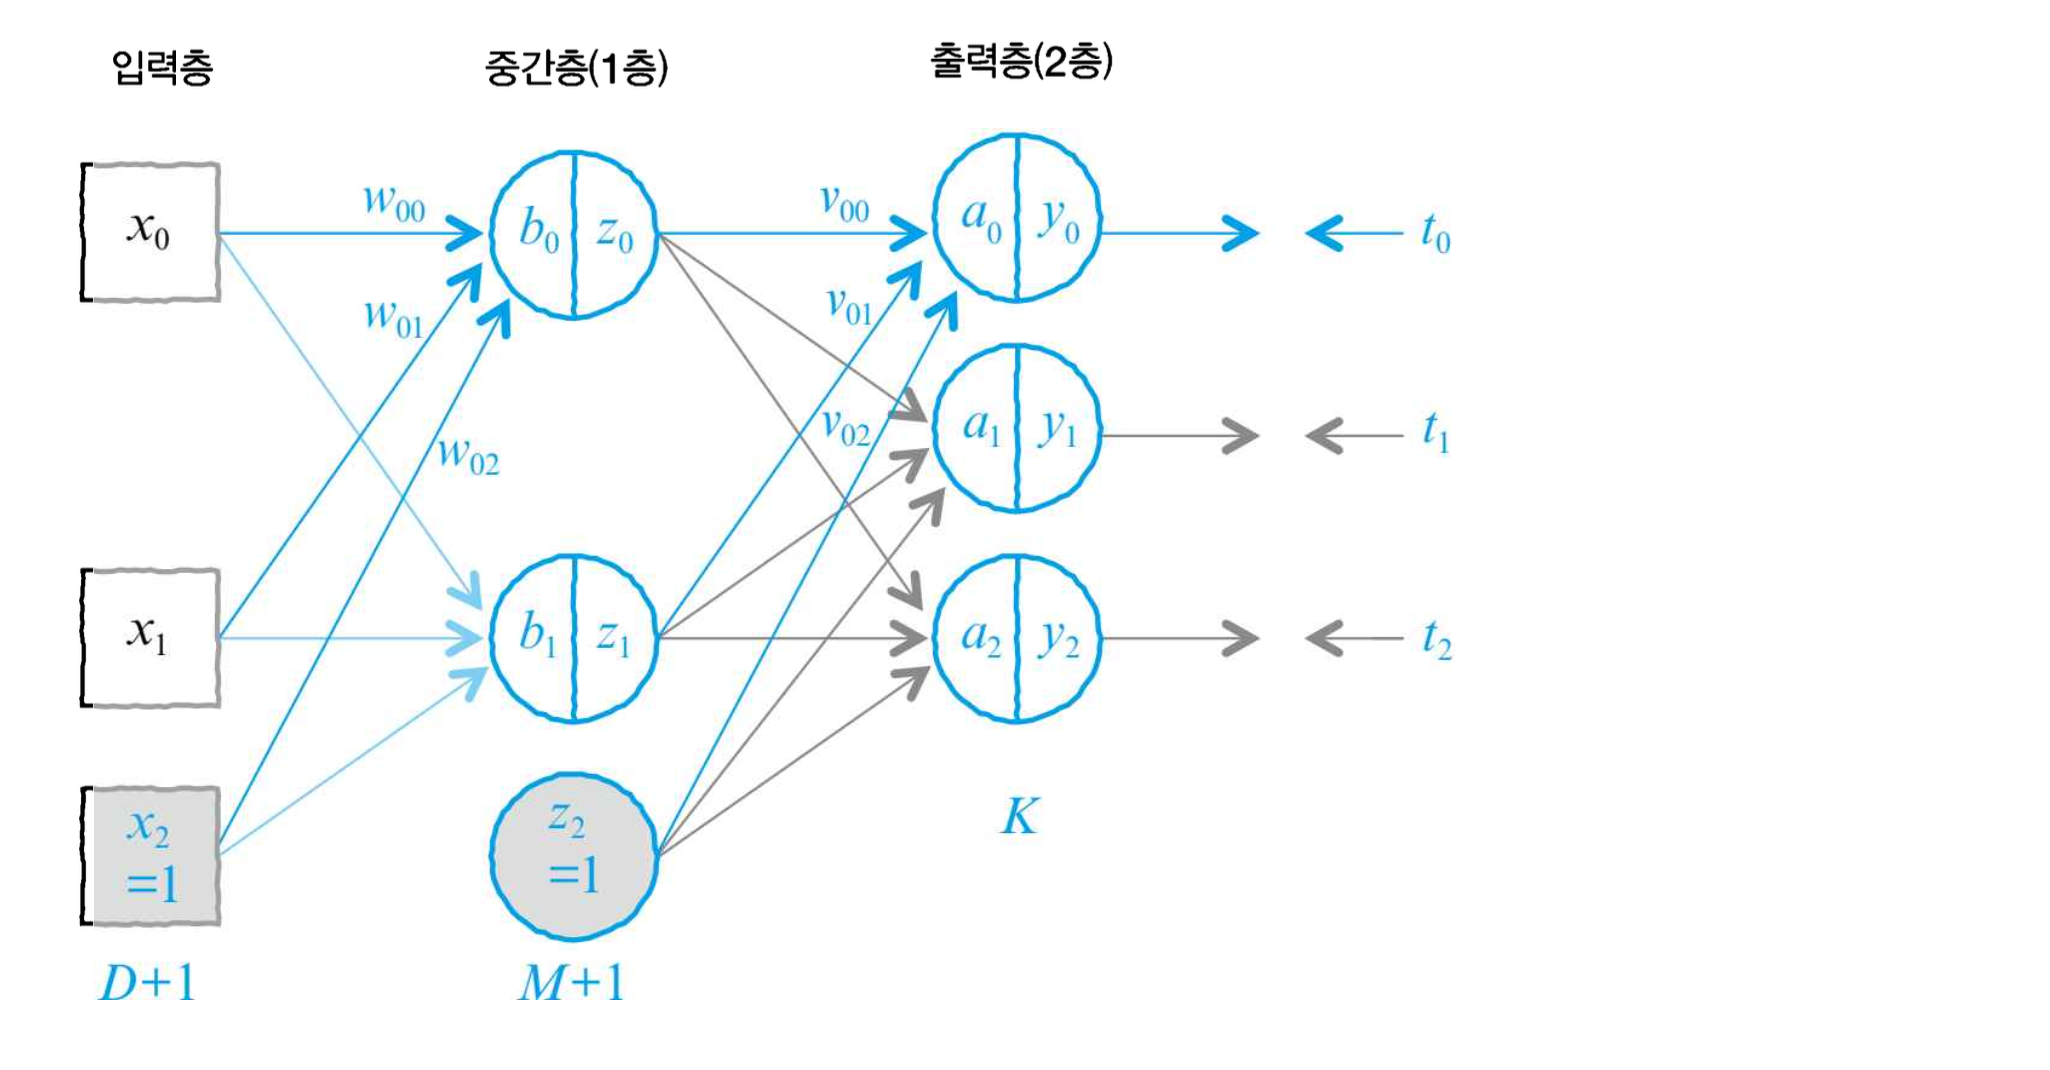

- 뉴런 모델은 입력 공간을 선으로 나누는 단순한 기능뿐이지만, 이를 여러 개 조합하면 강력한 힘을 발휘 가능 → 신경망 모델 혹은 신경망이라고 함
- 여기서는 신호가 되돌아가는 경로 없이 한 방향으로만 흐르는 '피드 포워드 신경망'을 고려
- 2차원의 입력 (x0, x1)을 3개의 뉴런으로 출력하기 때문에 2차원에서 주어진 수치를 3개의 카테고리로 분류 가능
    - 출력 뉴런 각각의 출력 값이 각 카테고리에 속하는 확률을 나타내도록 학습

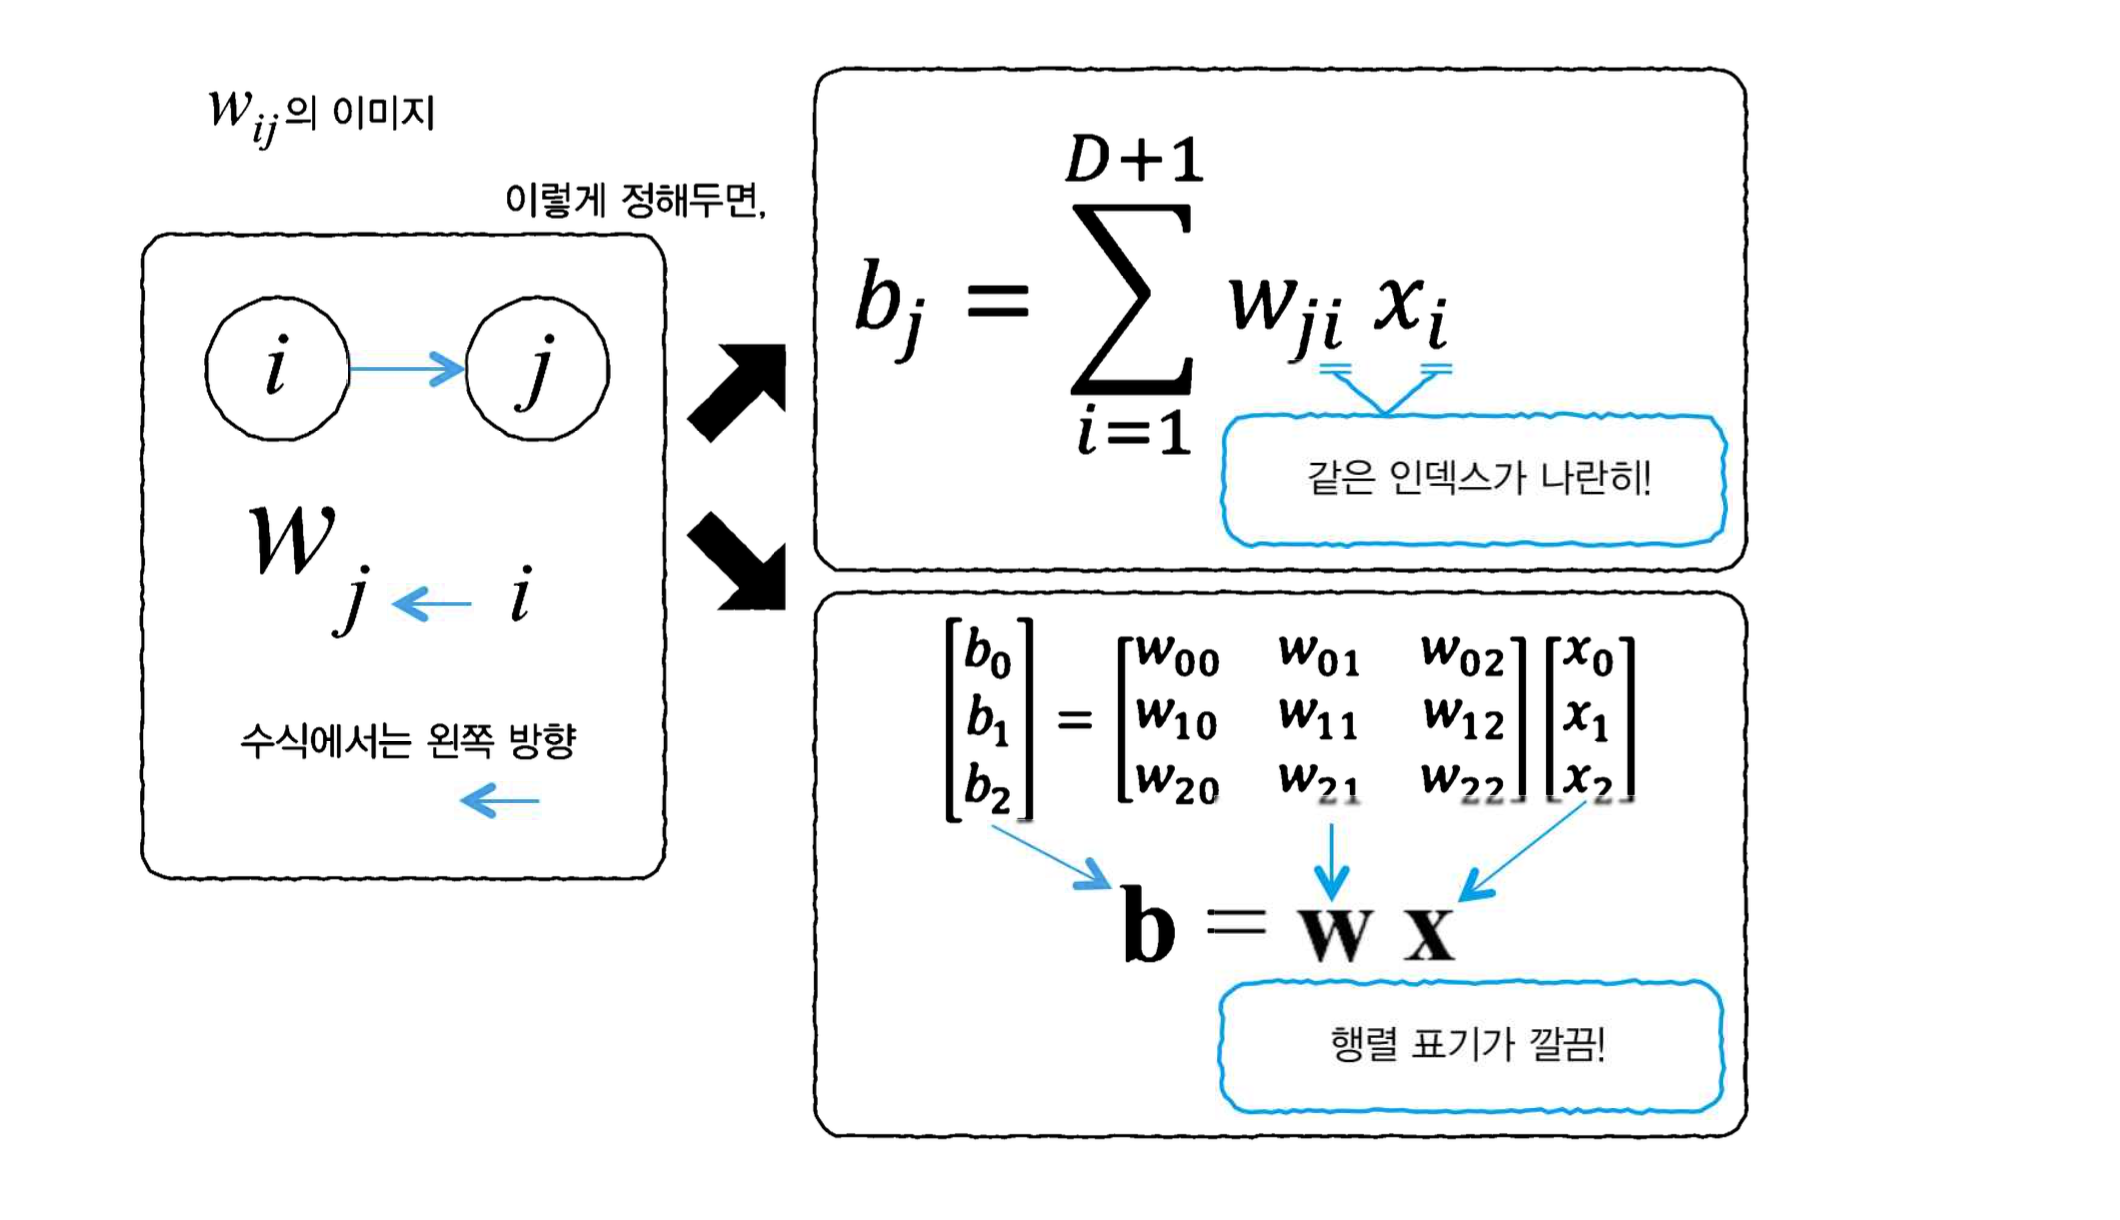

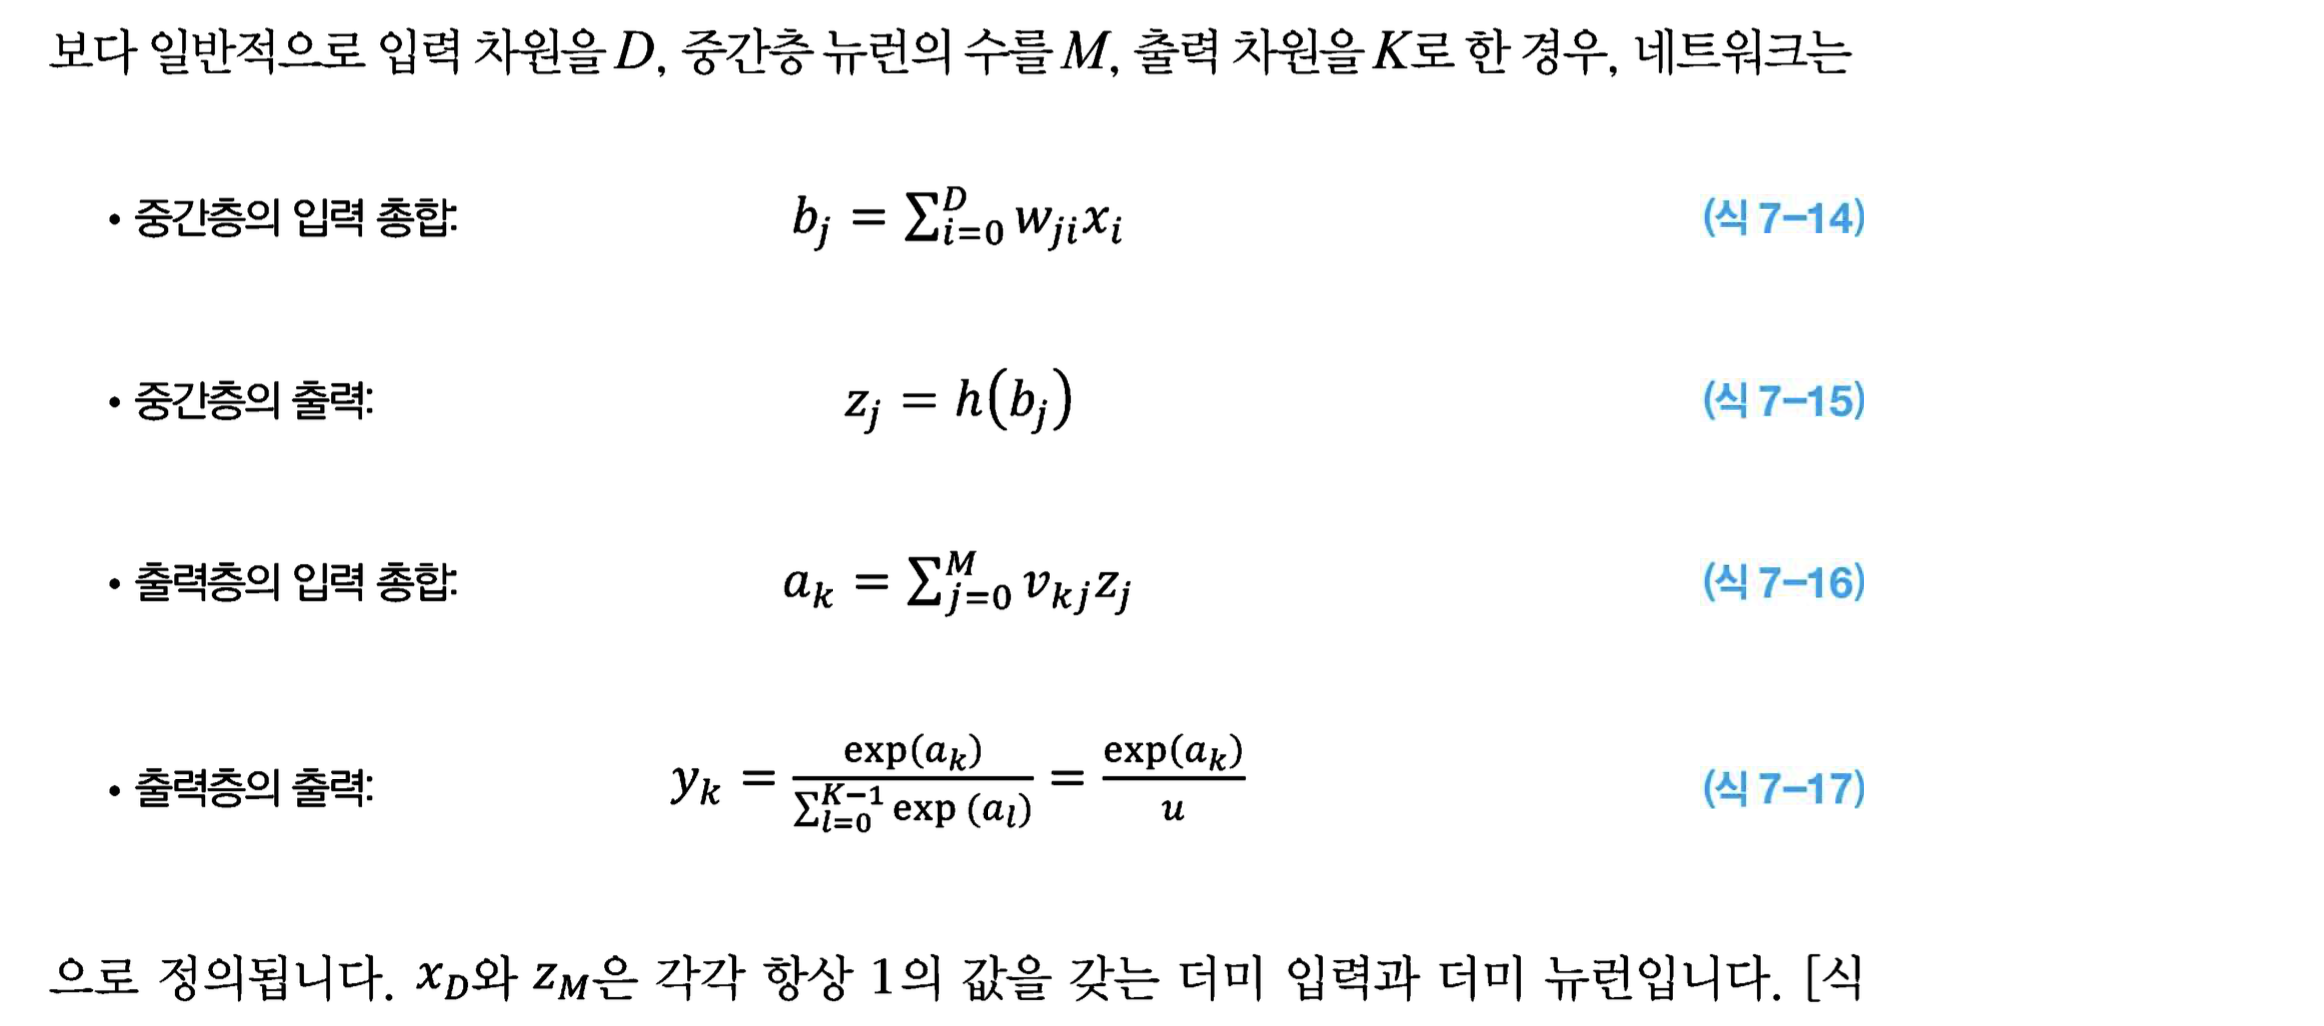

(식 7-14), (식 7-16)에서 합을 취하는 횟수는 더미 뉴런의 몫까지 포함하여 각 D+1, M+1

### 7.2.2 2층 피드 포워드 신경망의 구현

In [ ]:
import numpy as np

# 데이터 생성 --------------------------
np.random.seed(seed=1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수

T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))

X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + \
        Mu[T[n, :] == 1, k]

In [ ]:
# ----------- 2분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]

# ----------- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train = X_train, T_train = T_train,
         X_test = X_test, T_test = T_test,
         X_range0 = X_range0, X_range1 = X_range1)

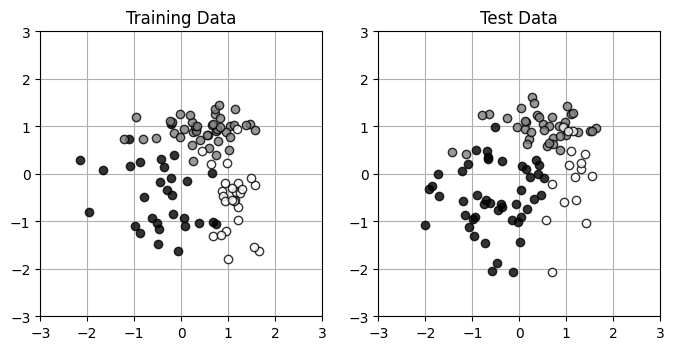

In [ ]:
import matplotlib.pyplot as plt

# 데이터를 그리기 -----------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle = 'none',
                 marker = 'o', markeredgecolor = 'black',
                 color = c[i], alpha = 0.8)
    plt.grid(True)

# 메인 --------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

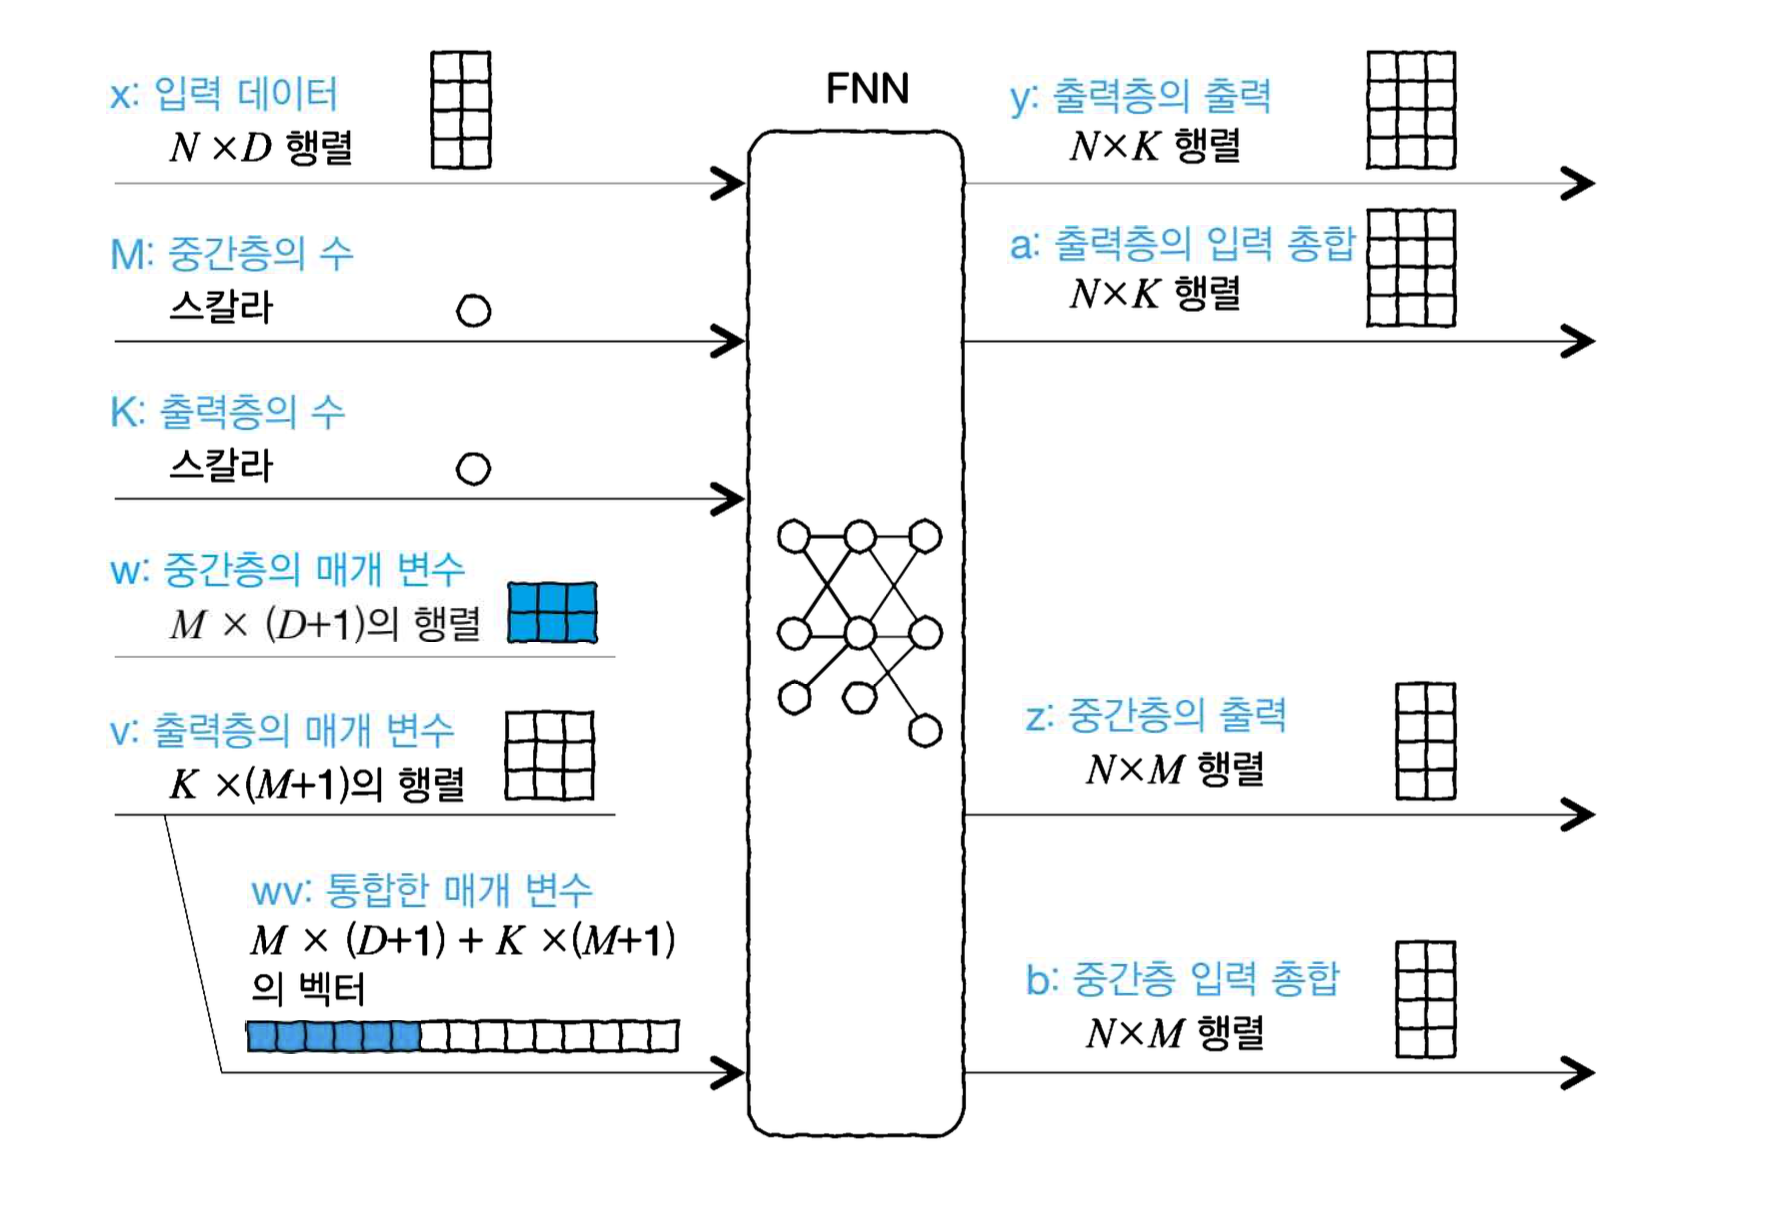

**(왼) 네트워크의 인수**
- 기본적으로 입력 x(D차원 벡터)를 받아 y(K차원 벡터)를 출력
    - N개의 데이터를 한꺼번에 처리할 수 있도록, x를 N\*D 행렬 y를 N\*K 행렬로
    - 벡터 y의 요소 y[n, 0], y[n, 1], y[n, 2]는 x[n, :]이 클래스 0, 1, 2에 속해 있을 가능성을 나타내고 있음 → 모두 더하면 1
- 중간층의 수와 차원도 자유롭게 바꿀 수 있는 인수로, 각각 M, K
- 중간층 가중치 w와 출력층 가중치 v도 인수로 전달
    - w는 M * (D+1) 의 행렬
    - v는 K * (M+1)의 행렬
    - 둘 모두 바이어스의 입력을 고려하여 결정됨
    - 그리고 이 둘을 통합하여 덩어리 벡터 wv로 네트워크에 전달




**(오) 네트워크의 출력**
- y(N*K행렬): N개의 데이터에 대응한 출력
- z: 중간층의 출력
- a, b: 출력층과 중간층의 입력 총합
    - 위의 정보들은 wv를 학습할 때 사용

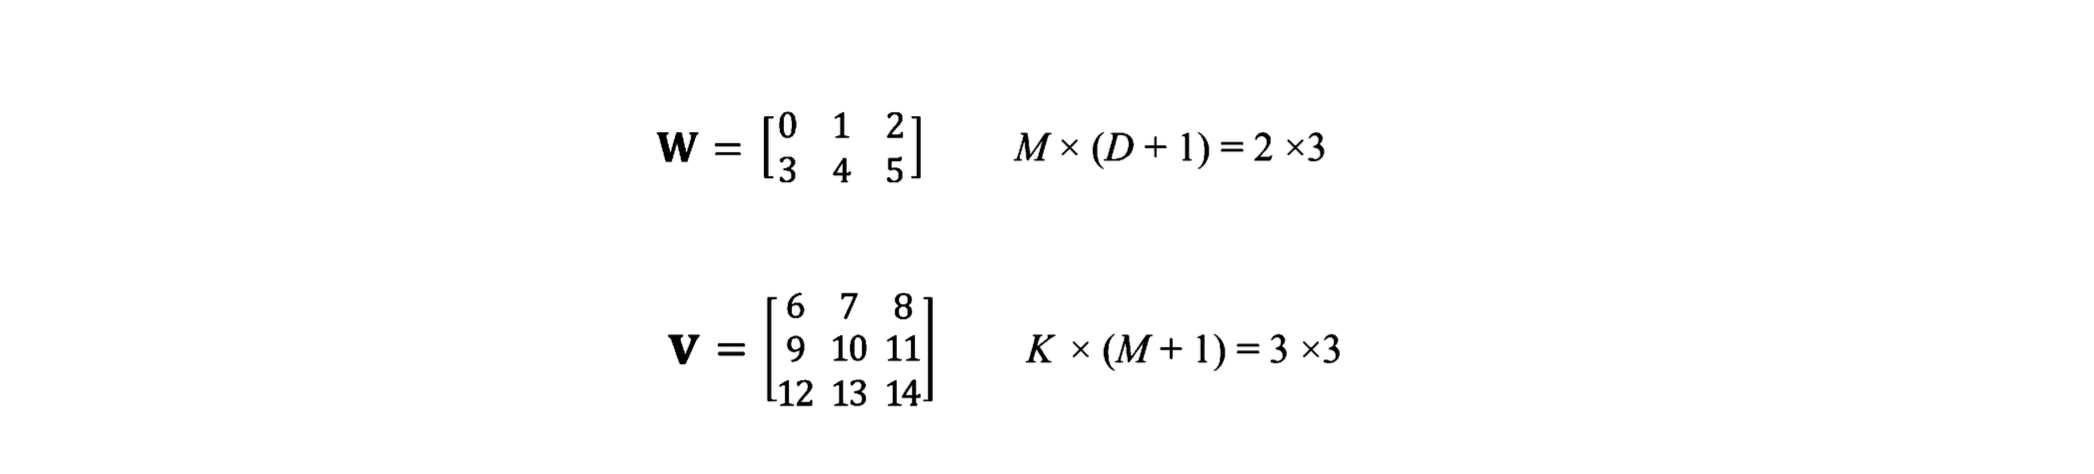

- 이 경우 wv는 아래와 같음
    - 길이: M \* (D+1) + K * (M+1)
    - 학습하는 매개 변수를 한 곳에 모아두면 최적화 프로그램을 만들기 용이함

In [ ]:
wv = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [ ]:
# 시그모이드 함수 ----------
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# 네트워크 ----------------
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M * (D+1)] # 중간층 뉴런의 가중치
    w = w.reshape(M, (D+1))
    v = wv[M * (D+1):] # 출력층 뉴런의 가중치
    v = v.reshape((K, M+1))
    b = np.zeros((N, M+1)) # 중간층 뉴런의 입력 총합
    z = np.zeros((N, M+1)) # 중간층 뉴런의 출력
    a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런의 출력
    for n in range(N):
        # 중간층의 계산
        for m in range(M):
            # np.r_[x[n, :], 1] → 항상 1이 되는 더미 입력을 x의 3번째 요소로 덧붙인 부분 (행렬을 옆으로 연결시키는 명령)
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
            z[n, m] = Sigmoid(b[n, m])
        # 출력층의 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b

# test -------------------
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

### 7.2.3 수치 미분법
- 2층의 피드 포워드 네트워크에서 3분류 문제 풀기
- Loss function: 평균 교차 엔트로피 사용

In [ ]:
# 평균 교차 엔트로피 오차 -------
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce

# test ---------------------
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

경사하강법을 적용하려면 오차함수를 매개변수로 편미분한 식이 필요하지만, 계산 속도에 신경쓰지 않는다면 간단히 수치적 미분과 마찬가지의 값을 구할 수 있음

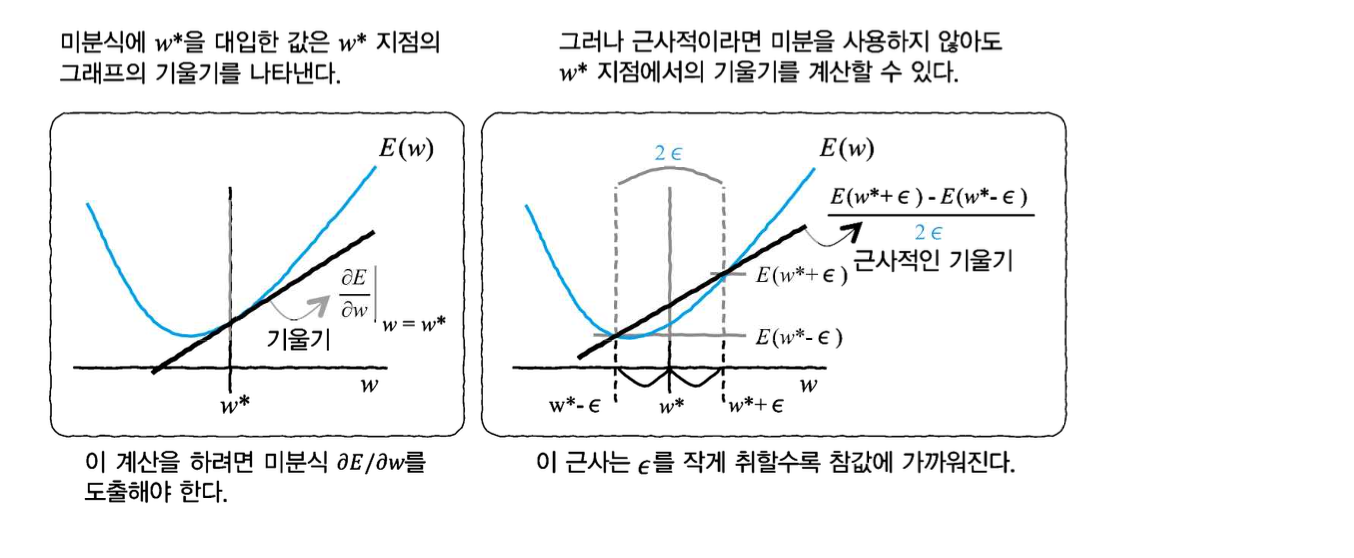

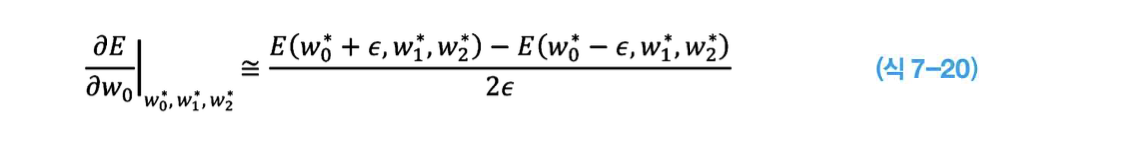

위의 경우는 매개 변수가 하나인 예지만, 여러 개로 확장해도 동일하게 적용 가능
- 예를 들어 매개 변수가 w0, w1, w2인 경우 하나의 변수를 제외한 나머지 변수를 고정하고 편미분을 구하는 일을 반복하면 됨
- 위와 같은 이유로 이 단점은 정밀도의 오차보다는 계산 비용!
- 한 매개 변수의 미분을 계산하기 위한 매개 변수 하나에 두 번의 E 계산이 필요

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


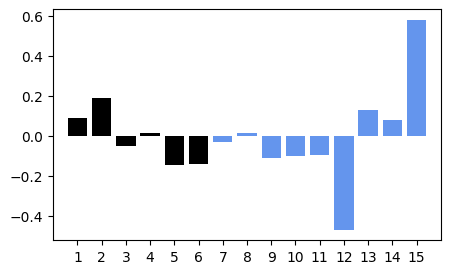

In [ ]:
# - 수치 미분 ---------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv


# -- dVW의 표시 ------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M*3 + 1), wv[:M * 3], align='center', color='black')
    plt.bar(range(M*3 + 1, N+1), wv[M * 3:],
            align='center', color='cornflowerblue')
    plt.xticks(range(1, N+1))
    plt.xlim(0, N+1)


# - test ------------------
M = 2
K = 3
nWV = M * 3 + K * (M+1)
np.random.seed(1) ### 난수 고정
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

(왼) 까만 막대 그래프 w에 해당 </br>
(오) 하늘색 막대 그래프 v에 해당

### 7.2.4 수치 미분법에 의한 경사 하강법

In [ ]:
import time

# 수치 미분을 사용한 경사 하강법 ---------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001

    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train) # wvt 갱신
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test


# 메인 -----------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1) ### 난수 고정
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M+1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:185.448 sec


- 지금까지와 다른 부분
    - 입력에 학습시키는 가중치의 초기값 wv_init
    - 훈련 데이터뿐만 아니라 테스트 데이터도 입력 (학습 단계별로 테스트 데이터의 오차도 체크해 오버피팅을 방지하고자 함, 학습에는 사용 X)

- n: 학습 단계 수
- alpha: 학습 상수
- Fit_FNN_num 출력: 최적화된 매개변수 wvt

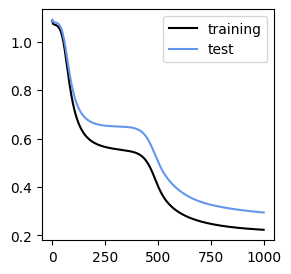

In [ ]:
# 학습 오차의 표시 ----------------------
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.legend()
plt.show()

학습에 사용하지 않은 테스트 데이터의 오차도 도중에 오르지 않고 떨어지고 있으므로 오버피팅은 일어나지 않았다고 해석 가능
- 400 단계 부근에서 학습이 수렴한 것으로 보이지만 학습이 다시 진행된다는 점이 특이점

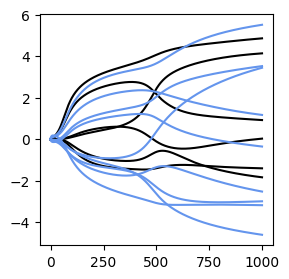

In [ ]:
# 가중치의 시간 변화의 표시 ----------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

- 중간층의 가중치 w: 검정
- 출력층의 가중치 v: 파랑
- 0 주변의 기본 값으로 시작해 각각 특정 값으로 서서히 수렴
- 400 단계 부근에서 각각의 가중치 그래프가 교차하고 있는데, 이것은 가중치 갱신 방향(오차함수의 기울기 방향)의 변화를 의미
    - 혹은 가중치가 안장점 근처를 통과했기 때문일지도 모름 (아래 사진 참고)

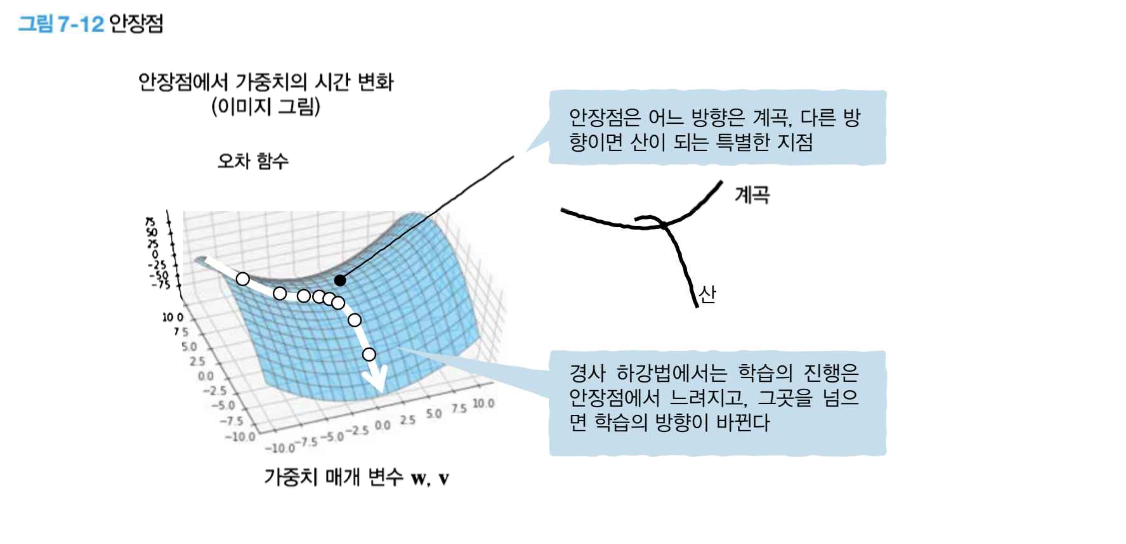

(그림) 2차원 안장점 통과 이미지

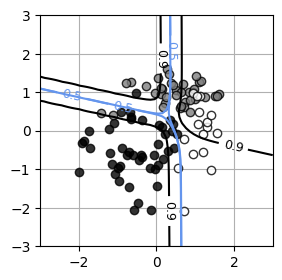

In [ ]:
# 경계선 표시 함수 ----------------------
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)


# 경계선 표시 -------------------------
plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

- 학습에 사용하지 않은 테스트 데이터만 플롯
- 네트워크가 각각 클래스에 0.5 또는 0.9 이상으로 판정한 영역의 경계를 표시

**여기까지 수치적 계산법을 보았고, 이제 해석적 계산법을 볼 차례**

### 7.2.5 오차 역전파법 (Backpropagation)
- 네트워크의 출력 오차 정보를 사용, 출력층의 가중치 v_kj에서 중간층의 가중치 w_ji로 입력 방향의 반대로 가중치를 갱신
- 경사 하강법을 피드포워드 네트워크에 적용하면 오차 역전법이 자연스럽게 도출됨

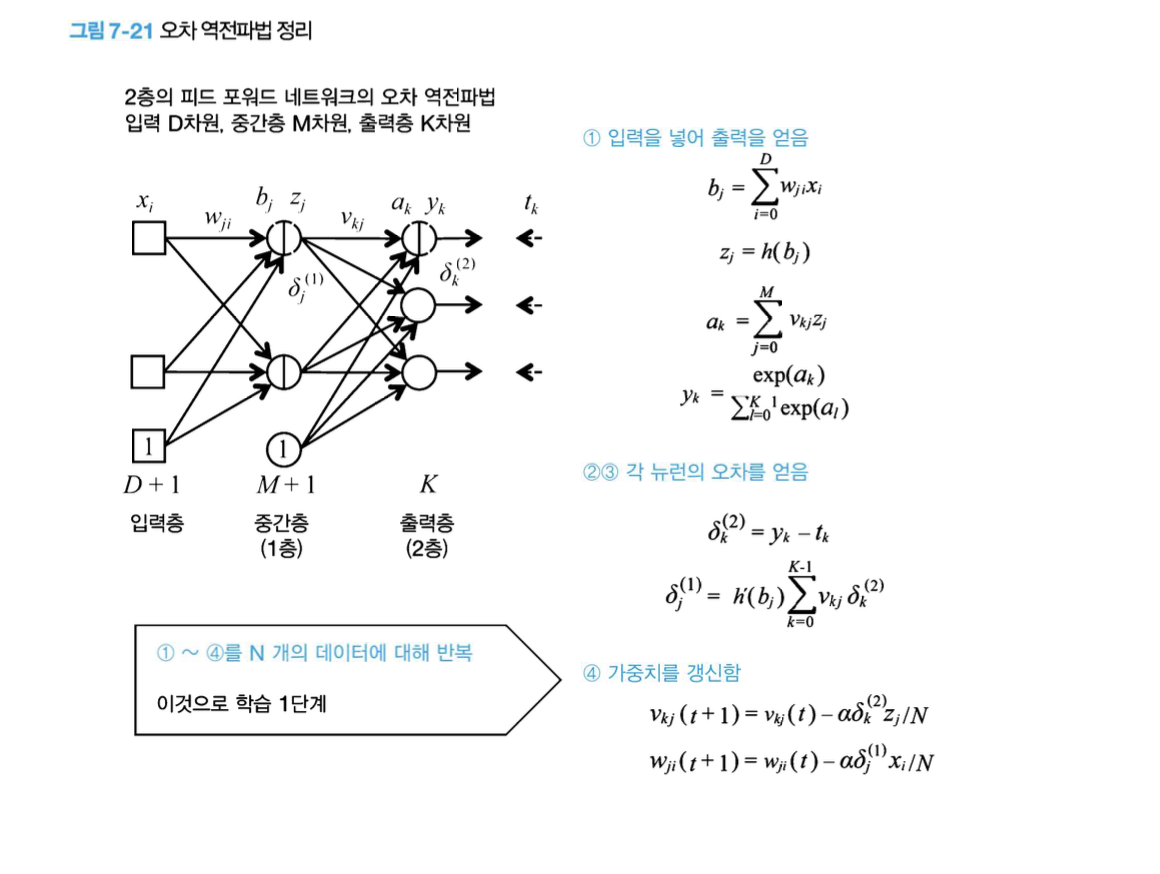

### 7.2.8 오차 역전파법의 구현

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


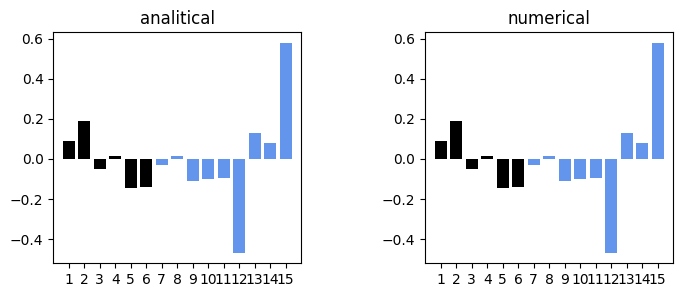

In [ ]:
# -- 해석적 미분 -------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # ① x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # ② 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


# ------ Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M*3 + 1), wv[:M*3],
            align = 'center', color = 'black')
    plt.bar(range(M*3 + 1, N+1), wv[M*3:],
            align = 'center', color = 'cornflowerblue')
    plt.xticks(range(1, N+1))
    plt.xlim(0, N+1)


# -- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M+1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)


dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)


dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)


plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

해석적 미분값과 수치 미분값 거의 일치
→ 같은 문제를 오차 역전파법으로 풀이

In [ ]:
import time

# 해석적 미분을 사용한 경사 하강법 ----
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M+1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time: {0:.3f} sec".format(calculation_time))

Calculation time: 22.131 sec


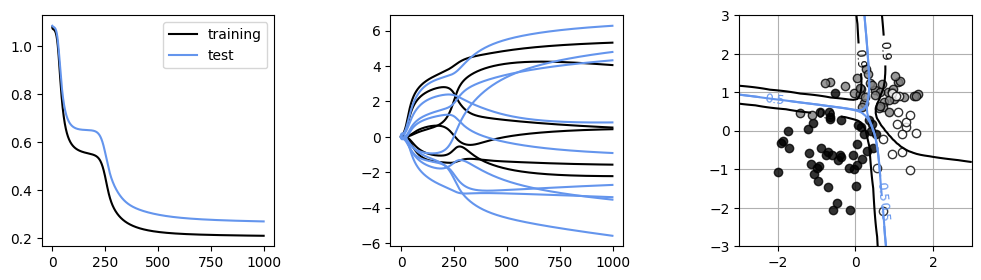

In [ ]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 오차의 표시 -----------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.legend()

# 가중치의 시간 변화 표시 ------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M*3], 'black')
plt.plot(WV_hist[:, M*3:], 'cornflowerblue')

# 경계선 표시 ---------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

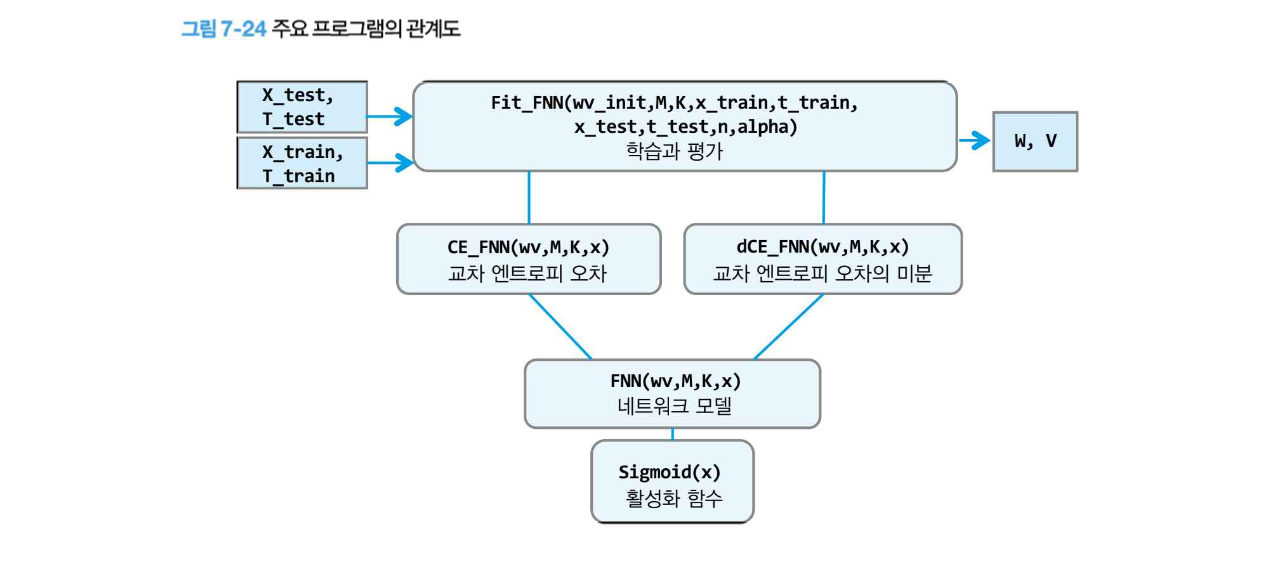

    AFTER 네트워크의 규모가 커질수록 미분 계산 속도는 중요해짐
    수치 미분은 도출된 미분 방정식이 맞는지 확인하는 용도로 사용 가능
    해석적 미분과 같이 사용해서 Gradient Check

### 7.2.9 학습 후 뉴런의 특성

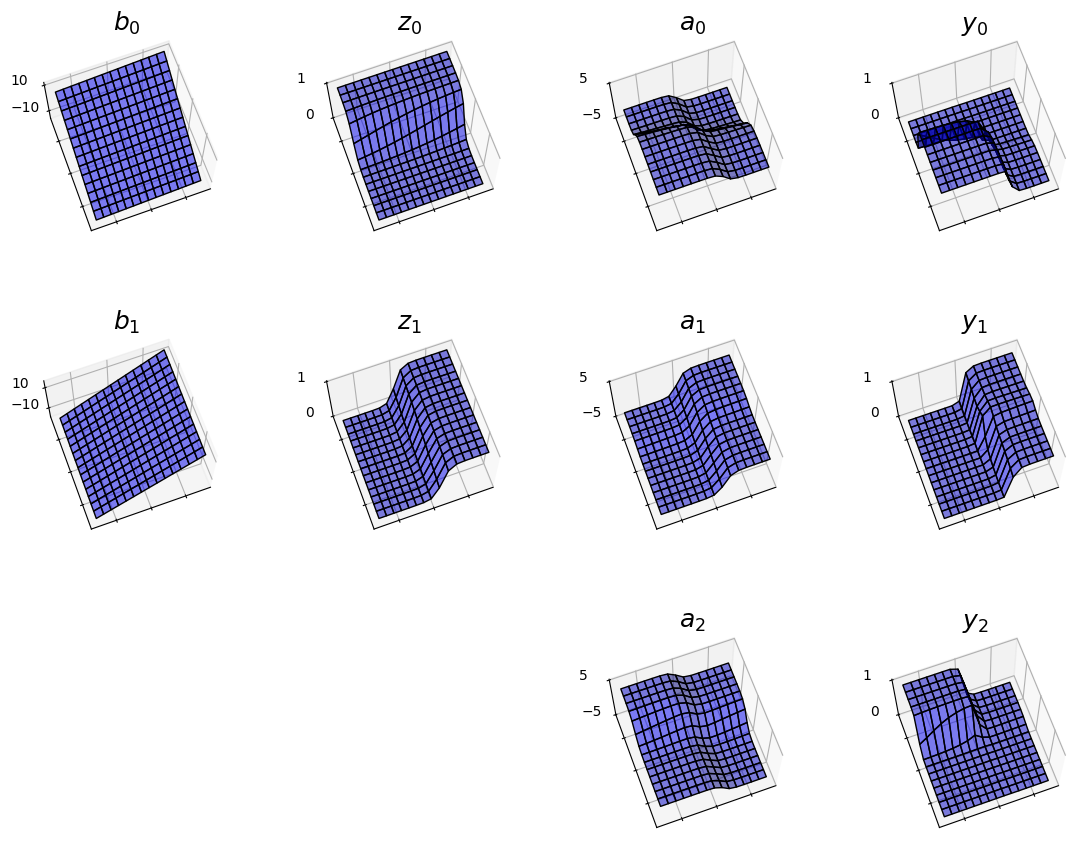

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)


M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))


for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))


plt.show()

    AFTER 중간층 입력 - 출력 / 출력층 입력 - 출력 순의 입출력맵
    - 중간층 입력맵(bj)은 평면, W에 의해서 면의 기울기 결정됨
    - 중간층 출력맵(zj)는 중간층 입력을 시그모이드에 통과시킨 값 맵핑
    - 출력층 입력맵은 z0, z1의 조합에 의해 만들어짐
    - 출력층 출력맵은 a를 소프트맥스에 통과시켜 누른 형태
    >> '신경망 모델' 기저함수의 특성도 학습에 의해 자동으로 최적화되는 툭별한 선형 소프트맥스 모델

# 7.3 케라스로 신경망 모델 구현
### 7.3.1 2층 피드 포워드 신경망

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(1) # (A)
import keras.optimizers # (B)
from keras.models import Sequential # (C)
from keras.layers import Dense, Activation # (D)

# 데이터 로드 -----------------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
# 데이터를 그리기 -------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

In [ ]:
# 난수 초기화
np.random.seed(1)

# --- Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform')) # (A)
model.add(Dense(3, activation='softmax',
                kernel_initializer='uniform')) # (B)
sgd = keras.optimizers.SGD(learning_rate=1, momentum=0.0,
                           nesterov=False) # (C)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy']) # (D)


# --------- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test)) # (E)


# --------- 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))
calculation_time = time.time() - startTime
print('Calculation time: {0:.3f} sec'.format(calculation_time))

cross entropy 0.26, accuracy 0.90
Calculation time: 35.820 sec


113/113 [==============================] - 0s 2ms/step


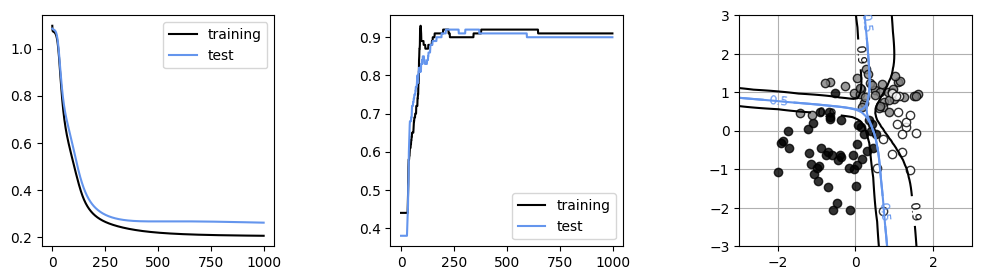

In [ ]:
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace=0.5)


# 학습 곡선 표시 ----------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label = 'training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test') # (B)
plt.legend()


# 정확도 표시 --------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label = 'training') # (C)
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test') # (D)
plt.legend()


# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn*xn, 1)), np.reshape(xx1, (xn*xn, 1))]
y = model.predict(x) # (E)
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()